## Q1

Defining the integrator with prototype to take one step, to integrate $ \frac{dy}{dx} = \frac{y}{1+x^2} $

In [74]:
import numpy as np
from matplotlib import pyplot as plt

#definig dy/dx
def f(x,y):
    dydx=y/(1+x**2)
    return dydx

#defining the rk4 integrator
def rk4_step(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

Integrating from x = -20 yo x = 20 using 200 steps. 

In [75]:
y0=1  #The initial value
x=np.linspace(-20,20,201) #x with 200 steps = 201 points
h=np.median(np.diff(x))
y=np.zeros(len(x))
y[0]=y0
for i in range(len(x)-1):
    y[i+1]=rk4_step(f,x[i],y[i],h)
truth = np.exp(np.arctan(x)) #the true value of the function at the x points (without the constant scaling)

The true integrated solution will be of the from $y = cexp(arctan(x))$. I find the value of c and plot the true and obtained functions. As can be seen, the true and obtained functions agree to an accuracy of $10^{-5}$

Text(0, 0.5, 'y')

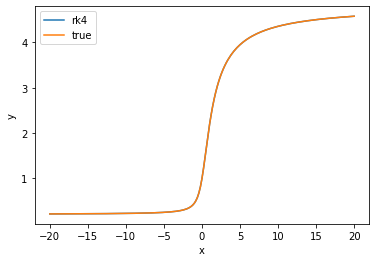

In [76]:
scale = truth[0]/y[0] #get the constant scaling c0 between the true value and our integrated function
plt.plot(x,y*scale,label="rk4") #multiply the constant scaling to our integrated y 
plt.plot(x,truth,label="true")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'error')

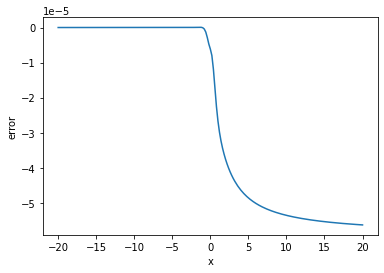

In [77]:
#getting the error our integrated y value 
error = y*scale - truth
plt.plot(x, error)
plt.xlabel("x")
plt.ylabel("error")

Function that takes a step of length h, compares that to two steps of length h/2, and uses
them to cancel out the leading-order error term from RK4. For a step of size h, we can say $y(x+h) = y1 + h^5 + O(h^6)$ and for a step of size h/2, $y(x+h) = y2 + 2(h/2)^5 + O(h^6)$, where y1 and y2 are the values returned by the function and y(x+h) is the true value. We can see that using these two equations, we can write $y(x+h) = y2 + (y2-y1)/15 + O(h^6)$. Thus, the error reduced from $O(h^5)$ to $O(h^6)$. This function uses 4 (for step size h) + 3 (for step size h/2 with the function at initial point already evaluated) + 4 = 11 function calls per step size

In [78]:
#Function to take calculate y(x+h) with a step size of h (y1), and y(x+h) with two steps of size h/2 (y2) and use 
# y1 and y2 to calculate y(x+h) to O(h^5) accuracy. 
def rk4_stepd(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    y1 = y + dy
    k1_half1 = k1/2
    k2_half1=(h/2)*fun(x+h/4,y+k1_half1/2)
    k3_half1=(h/2)*fun(x+h/4,y+k2_half1/2)
    k4_half1=(h/2)*fun(x+h/2,y+k3_half1)
    dy_half1 = (k1_half1+2*k2_half1+2*k3_half1+k4_half1)/6
    y2_half1 = y + dy_half1
    x2 = x + h/2
    k1_half2 = fun(x2,y2_half1)*h/2
    k2_half2 = (h/2)*fun(x2+h/4,y2_half1+k1_half2/2)
    k3_half2 = (h/2)*fun(x2+h/4,y2_half1+k2_half2/2)
    k4_half2=(h/2)*fun(x2+h/2,y2_half1+k3_half2)
    dy_half2 = (k1_half2+2*k2_half2+2*k3_half2+k4_half2)/6
    y2 = y2_half1 + dy_half2
    delta = y2 - y1
    print("Difference between 2 h/2 steps and 1 h step is {}".format(delta))
    return y2 + delta/15

The intial function which has 200 steps uses $200*4$ function calls. For the new function to use the same number of function calls, the number of steps should be $200*4/11$. 

In [79]:
y0=1
steps = int(np.floor(200*4/11))
x2=np.linspace(-20,20,steps+1)
h2=np.median(np.diff(x2))
y2=np.zeros(len(x2))
y2[0]=y0
for i in range(len(x2)-1):
    y2[i+1]=rk4_stepd(f,x2[i],y2[i],h2)
truth2 = np.exp(np.arctan(x2))
print("fun count = {}".format(steps*11))

Difference between 2 h/2 steps and 1 h step is -3.452504948597834e-11
Difference between 2 h/2 steps and 1 h step is -4.0998093808752856e-11
Difference between 2 h/2 steps and 1 h step is -4.8930859364304524e-11
Difference between 2 h/2 steps and 1 h step is -5.871081398822753e-11
Difference between 2 h/2 steps and 1 h step is -7.084555164738049e-11
Difference between 2 h/2 steps and 1 h step is -8.600498091482223e-11
Difference between 2 h/2 steps and 1 h step is -1.0508127701314152e-10
Difference between 2 h/2 steps and 1 h step is -1.2927170445209413e-10
Difference between 2 h/2 steps and 1 h step is -1.6020273996275591e-10
Difference between 2 h/2 steps and 1 h step is -2.0010326728936434e-10
Difference between 2 h/2 steps and 1 h step is -2.520663677785251e-10
Difference between 2 h/2 steps and 1 h step is -3.2043412367954716e-10
Difference between 2 h/2 steps and 1 h step is -4.1138425999065475e-10
Difference between 2 h/2 steps and 1 h step is -5.338305353319583e-10
Difference b

Text(0, 0.5, 'y')

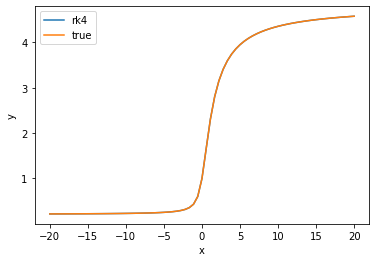

In [80]:
scale2 = truth2[0]/y2[0] #get the constant scaling c0 between the true value and our integrated function
plt.plot(x2,y2*scale2,label="rk4")
plt.plot(x2,truth2,label="true")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

As can be seen, the new function is accurate to $O(10^{-6})$, that is more accurate than the initial function even with less number of steps.

Text(0, 0.5, 'error')

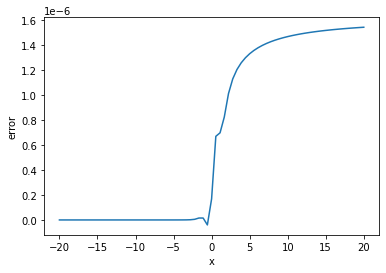

In [81]:
#getting the error our integrated y value 
error2 = y2*scale2 - truth2
plt.plot(x2, error2)
plt.xlabel("x")
plt.ylabel("error")

## Q2

In [82]:
import numpy as np
from scipy import integrate
import time

## a)

Setting up the problem taking 164.3 microseconds as 1 time step.  I calculated the lifetime of each element in units of this timestep. 

In [83]:
#Taking 164.3 us as 1 time step
def fun(x,y):
    timesteps_perday = 24*60*60/(164.3*10**-6)
    timestep_permin = 60/(164.3*10**-6)
    lifetime = np.zeros(14)
    lifetime[0] = 4.468*10**9*365*timesteps_perday
    lifetime[1] = 24.10*timesteps_perday
    lifetime[2] = 6.7*60*timestep_permin
    lifetime[3] = 245500*365*timesteps_perday
    lifetime[4] = 75380*365*timesteps_perday
    lifetime[5] = 1600*365*timesteps_perday
    lifetime[6] = 3.8235*timesteps_perday
    lifetime[7] = 3.10*timestep_permin
    lifetime[8] = 26.8*timestep_permin
    lifetime[9] = 19.9*timestep_permin
    lifetime[10] = 1
    lifetime[11] = 22.3*365*timesteps_perday
    lifetime[12] = 5.015*365*timesteps_perday
    lifetime[13] = 138.376*timesteps_perday
    dU238dx = -y[0]/lifetime[0]
    dTh234dx = y[0]/lifetime[0] - y[1]/lifetime[1]
    dPa234dx = y[1]/lifetime[1] - y[2]/lifetime[2]
    dU234dx = y[2]/lifetime[2] - y[3]/lifetime[3]
    dTh230dx = y[3]/lifetime[3] - y[4]/lifetime[4]
    dRa226dx = y[4]/lifetime[4] - y[5]/lifetime[5]
    dRn222dx = y[5]/lifetime[5] - y[6]/lifetime[6]
    dPo218dx = y[6]/lifetime[6] - y[7]/lifetime[7]
    dPb214dx = y[7]/lifetime[7] - y[8]/lifetime[8]
    dBi214dx = y[8]/lifetime[8] - y[9]/lifetime[9]
    dPo214dx = y[9]/lifetime[9] - y[10]/lifetime[10]
    dPb210dx = y[10]/lifetime[10] - y[11]/lifetime[11]
    dBi210dx = y[11]/lifetime[11] - y[12]/lifetime[12]
    dPo210dx = y[12]/lifetime[12] - y[13]/lifetime[13]
    dPb206dx = y[13]/lifetime[13]
    dydx=[dU238dx, dTh234dx, dPa234dx, dU234dx, dTh230dx, dRa226dx, dRn222dx, dPo218dx, dPb214dx, dBi214dx, \
          dPo214dx, dPb210dx, dBi210dx, dPo210dx, dPb206dx]
    return dydx

I use the Radua method in the solve_ivp function as this is a stiff problem.

In [84]:
y0=np.asarray([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
x0=0 
x1=10**21
t1=time.time();
ans_stiff=integrate.solve_ivp(fun,[x0,x1], y0, method='Radau');
t2=time.time();
print('took ',ans_stiff.nfev,' evaluations and ',t2-t1,' seconds to solve implicitly')

took  233  evaluations and  0.09059739112854004  seconds to solve implicitly


## b)

The plot makes sense analytically as the half life of U238 is approximately $10^{21}$ time steps. So, it takes a while for it to start decaying, till then the ratio is 0. But once it starts decaying, the lifetime of all others elements is much smaller, so we can say that U238 instantly decays to Pb206. So, as time approaches $10^{21}$, the ratio shoots up. 

Text(0, 0.5, 'Ratio of Pb206 to U238')

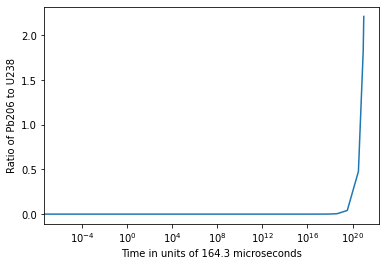

In [85]:
pb206 = ans_stiff.y[14]
u238 = ans_stiff.y[0]
t = ans_stiff.t
plt.plot(t, pb206/u238)
plt.xscale("log")
plt.xlabel("Time in units of 164.3 microseconds")
plt.ylabel("Ratio of Pb206 to U238")

As can be seen, the ratio of Th230 takes about $10^{15}$ time steps to rise from 0. The ratio then rises until the lifetime of Th230 is reached and it starts decaying. Since the lifetimes of Th230 and U234 are comparable, the ratio then becomes constant.

Text(0, 0.5, 'Ratio of Th230 to U234')

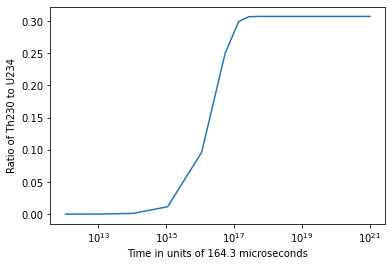

In [86]:
th230 = ans_stiff.y[4]
u234 = ans_stiff.y[3]
t = ans_stiff.t
t_interesting = []
ratio_interesting = []
for i in range(len(t)):
    if t[i] > 10**12 and np.isfinite(th230[i]/u234[i]):
        t_interesting.append(t[i])
        ratio_interesting.append(th230[i]/u234[i])
plt.plot(t_interesting, ratio_interesting)
plt.xscale("log")
plt.xlabel("Time in units of 164.3 microseconds")
plt.ylabel("Ratio of Th230 to U234")

# Q3

In [87]:
import pandas as pd

## a

We have $z - z_0 = a((x - x_0)^2 + (y - y_0)^2)$. We can rewrite this as $z = z_0 + a(x_0^2 + y_0^2)  + ax^2 + ay^2 -2ax_0x -2ay_0y$, so the new parameters are $z_0 + a(x_0^2 + y_0^2)$, a, a, $-2ax_0$, $-2ay_0$. The ith row in the A matrix will then be [1 $x_i^2$ $y_i^2$ $x_i$ $y_i$]

### b

In [88]:
df = pd.read_csv("dish_zenith.txt", sep=" ", header=None)
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values

In [89]:
ndata = len(x)
A=np.empty([ndata,5])
A[:, 0] = 1
A[:, 1] = x**2
A[:, 2] = y**2
A[:, 3] = x
A[:, 4] = y
lhs=A.T@A
rhs=A.T@z
m=np.linalg.inv(lhs)@rhs
pred=A@m
print("The fit paramters are : {}".format(m))

The fit paramters are : [-1.51232196e+03  1.66372555e-04  1.67010732e-04  4.33315842e-04
 -1.94065471e-02]


### c

In [90]:
N=np.mean((z-pred)**2) #noise in data
par_errs=np.sqrt(N*np.diag(np.linalg.inv(lhs))) #noise in model parameters
print("Noise in the a is {}".format(par_errs[1]))

Noise in the a is 7.869757218549181e-08


Focal length is 1/4a. Using the propogation of uncertainty rules, the error in focal length = (error in a)/($4a^2$)

In [91]:
#1/4f = a
a = m[1]
f = 1/(4*a)
err_a = par_errs[1]
err_f = err_a/(4*a**2)
print("The focal length is {} +- {} mm".format(f, err_f))

The focal length is 1502.6516827206915 +- 0.710784535000448 mm
